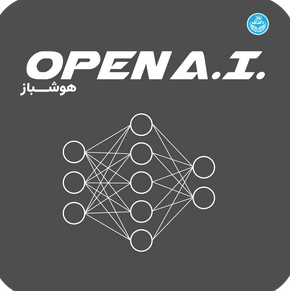

<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Day5 - HandsOn2</b></font><br>
        <hr/>

</div>

<pre>
.
├── Part 0: Import Necessary Libraries
|
└── Part 1: Clustering
    |
    ├── K-Means
    |
    └── Agglomerative Clustering
:
└── Part 2: MNIST Problem with Limited Samples (Bouns)
    |
    ├── Train Logestic Regression Model
    |
    └── Semi-Supervised Learning
________________________________________________________
:
└── Part3: Dimension Reduction
    |
    ├── Frorward Selection for Lineaar Regression
    |
    └── Curse of dimentionality and PCA


</pre>

The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. All right, without further ado, let's get started!

# Part 0: Import Necessary Libraries
We import the necessary libraries such as NumPy, Pandas, Matplotlib, Seaborn.

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Part 1: Clustering
Clustering is a machine learning technique for grouping similar data points together based on their features or characteristics. It involves partitioning a dataset into subsets, or clusters, such that data points within each cluster are more similar to each other than to those in other clusters. Clustering can be used for various applications, such as customer segmentation, image segmentation, and anomaly detection. There are different types of clustering algorithms, including k-means, hierarchical clustering, and density-based clustering. The choice of algorithm depends on the nature of the data and the specific problem at hand.

## K-Means
K-means is a popular clustering algorithm in machine learning that aims to partition a dataset into k clusters. It works by iteratively assigning data points to the nearest cluster centroid, and then updating the centroids based on the mean of the data points assigned to each cluster. The algorithm converges when the centroids no longer move significantly. The choice of k, the number of clusters, is often determined by domain knowledge or through techniques such as the elbow method or silhouette score. K-means has various applications, including image segmentation, document clustering, and market segmentation.

### Dataset
Before proceeding with any analysis, it is essential to become thoroughly familiar with the dataset.The Mall Customer dataset is a popular dataset used for customer segmentation analysis. It contains information about 200 customers of a mall, including their gender, age, annual income, and spending score. The spending score is a metric that quantifies how much a customer spends on a scale of 1 to 100, with higher scores indicating higher spending. 

#### 💭 Questions
- Read dataset in code cell below, The desired dataset is located in the `mall_customer.csv` file.
- Create a scatter plot of the data, use `Annual Income` as x-axis and `Spending Score` as y-axis.

 
**HINT**: Use seaborn for drawing plots in this part


In [194]:
df = pd.read_csv('mall_customer.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

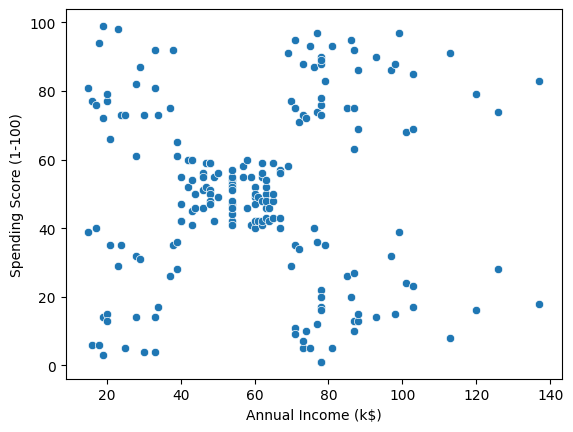

In [195]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])

### Train K-Means Model

#### 💭 Questions
- Train K-Means model using only `Annual Income` and `Spending Score` with setting `n_init`=1 three times (`n_cluster`=3, `init`=random)
- Plot K-Means models using scatter plot. They are similar to each others ?!
- Repeat two last step with setting `n_init`=10

In [196]:
from sklearn.cluster import KMeans

data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
data = np.array(data)

km = KMeans(n_init=1, n_clusters=3, init='random')
km.fit(data)

KMeans(init='random', n_clusters=3, n_init=1)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

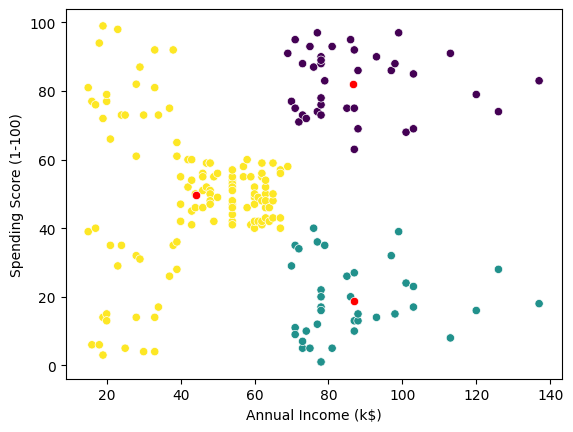

In [197]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=km.labels_)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], c='r')

In [198]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
data = np.array(data)

km = KMeans(n_init=10, n_clusters=3, init='random')
km.fit(data)

KMeans(init='random', n_clusters=3)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

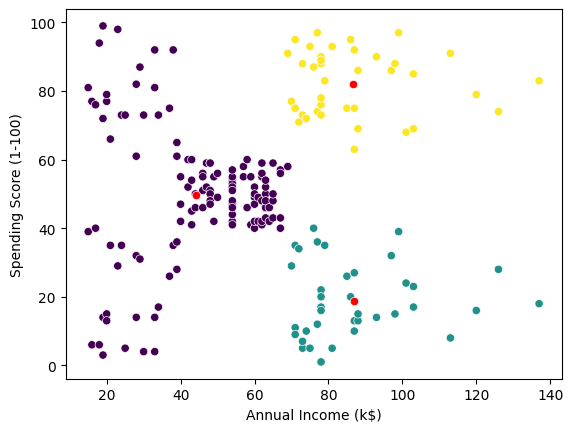

In [199]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=km.labels_)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], c='r')

#### 💭 Questions
- Find the best value for K or `n_cluster` parameter. $K\in[2, 15)$
  - Use within cluster sum squares as criteria. (You can find it inside K-Means attribiutes)
  - Find the best value using Elbow method
- Train K-Means model with optimal number of cluster and plot model using scatter plot
- Do you familar with `silhouette_score`? It's another criteria for clustering. (Bouns)

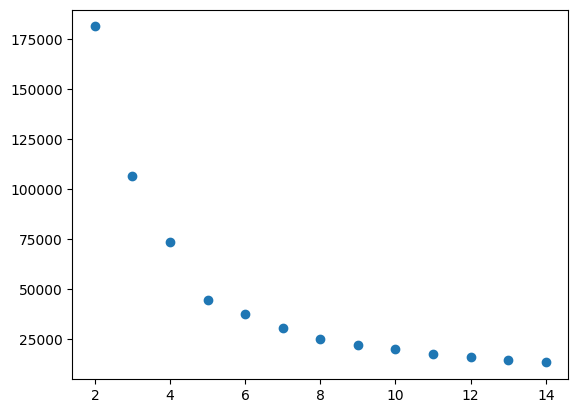

In [200]:
# use within cluster sum squares as criteria
# ploting the elbow graph

interias = []
for i in range(2, 15):
    km = KMeans(n_clusters=i).fit(data)
    interias.append(km.inertia_)

plt.scatter(range(2, 15), interias)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

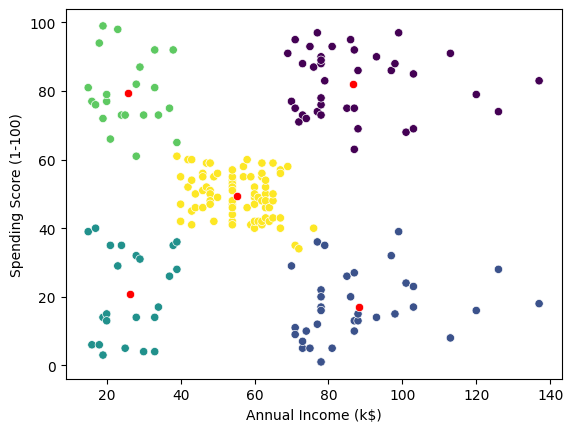

In [201]:
km = KMeans(n_clusters=5).fit(data)
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c=km.labels_)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], c='r')

In [202]:
from sklearn.metrics import silhouette_score

silhouette_score(data, km.labels_)

0.553931997444648

## Agglomerative Clustering

Agglomerative clustering is a bottom-up hierarchical clustering technique used in machine learning for grouping similar data points into clusters. The algorithm starts with each data point as a separate cluster and then merges clusters together based on their similarity until a stopping criterion is met. The similarity between clusters is typically measured using a linkage metric such as single linkage, complete linkage, or average linkage. Agglomerative clustering results in a dendrogram, which is a hierarchical representation of the clusters that can be cut at different levels to obtain different numbers of clusters. The algorithm is widely used in various applications such as image segmentation, bioinformatics, and social network analysis.

### Dataset
The Pokemon dataset is a popular dataset used in machine learning and data analysis. It contains information about 802 Pokemon species, including their names, types, and various statistics such as attack, defense, speed, and HP. The desired dataset is located in the `Pokemon.csv` file.

#### 💭 Questions
- Read dataset in code cell below. Just use ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'] colums.

In [203]:
data = pd.read_csv('Pokemon.csv')
data = data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
data.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


### Train Agglomerative Clustering

#### 💭 Questions
- Train Agglomerative Clustering model using only  with `n_cluster` equals to 10
- Calculate silhouette for trained model
- Train Agglomerative Clustering model with `n_cluster`=None and `distance_threshold`=0 
- Plot dendrogram for last trained model
  
**NOTE**: For ease of use we provide `plot_dendrogram` function for you. you can find description in the link mentioned above the cell

In [204]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [205]:
# FIXED CELL (DON'T CHANVE THIS CELL)
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model):
    # create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # plot the corresponding dendrogram
    plt.title("Hierarchical Clustering Dendrogram")
    dendrogram(linkage_matrix, truncate_mode="level", p=3)
    plt.xlabel('Number of points in node')
    plt.ylabel('Distance Threshold')
    plt.show()

In [206]:
# setting n_cluster=None and distance_threshold=0 ensure we compute the full tree.

ac = AgglomerativeClustering(n_clusters=10).fit(data)

silhouette_score(data, ac.labels_)

0.12891591400124025

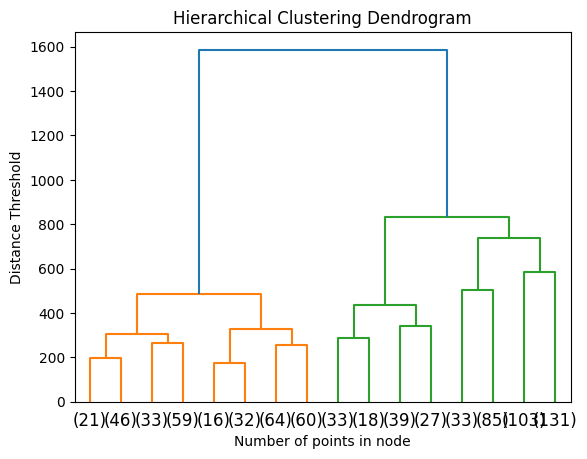

In [207]:
ac2 = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(data)

plot_dendrogram(ac2)

# Part 2: MNIST Problem with Limited Samples (Bouns)

## Dataset

In this chapter we will be using the MNIST dataset, which is a set of small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

#### 💭 Questions
- Import `load_digits` from `sklearn.datasets`
- Load dataset
- Split data to Train and Test with proportion of 80 to 20. (For reaching results consistent with us set `random_state`=0)

In [208]:
from sklearn.datasets import load_digits

In [209]:
from sklearn.model_selection import train_test_split

X = load_digits().data
y = load_digits().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train Logestic Regression Model

Here we assume only 25 first samples of training dataset is labeled, so in supervised learning scenario we only have 25 samples for training models.

#### 💭 Questions
- Train a Logistic Regression model using labeled training samples (`max_iter`=10000)
- Calculate the accuracy for trained model

In [210]:
X_train.shape

(1437, 64)

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

n_labeled = 25

lr = LogisticRegression(max_iter=10000).fit(X_train[:n_labeled], y_train[:n_labeled])
accuracy_score(lr.predict(X_test), y_test)


0.8027777777777778

## Semi-Supervised Learning

Semi-supervised learning combines labeled and unlabeled data to improve model accuracy. It uses a small amount of labeled data to train a model and a larger amount of unlabeled data to improve generalization. Unlabeled data helps the model learn better representations of the data. Techniques include self-training, co-training, and multi-view learning. Semi-supervised learning is useful when obtaining labeled data is expensive or time-consuming.

In this problem we have 1437 training samples and obtaining labeled data is time-consuming. So we are going to use K-Means model for finiding most represntative sample of out dataset and only obtain label for them instead of all samples.

### Train K-Means Model

#### 💭 Questions
- Train a K-Means model with setting `n_cluster`=50 (For reaching results consistent with us set `random_state`=0)
- Calculate distance of each datapoint from cluster centers (Use `fit_transform` function in K-Means class)
- Find index of representative samples and save them inside `representative_digit_idx` list

In [218]:
from sklearn.cluster import KMeans

km2 = KMeans(n_clusters=50, random_state=0).fit(X_train)
distances = km2.fit_transform(X_train)

In [219]:
representative_digit_idx = []

distances[3]

array([36.69405986, 49.94280282, 33.24625973, 51.13294559, 42.08869158,
       57.14977399, 51.32105402, 57.00942755, 52.79311718, 37.68549032,
       53.700238  , 43.77479297, 28.26505739, 50.79897356, 55.7275565 ,
       37.26289237, 47.24237332, 53.97884749, 32.58742566, 48.24953368,
       51.47086555, 52.86579852, 17.98612799, 44.55116366, 48.69207705,
       44.6966533 , 53.38059303, 49.70969543, 46.98158724, 51.02583752,
       54.12547568, 27.66260156, 53.82116174, 41.96721935, 44.87063296,
       45.63174551, 48.14779536, 39.94429512, 43.30433357, 44.46396655,
       52.22612279, 46.13716972, 51.19343465, 38.15603018, 53.81321823,
       56.09959484, 57.14825941, 31.08516029, 51.98878084, 49.18978162])

### Manual Labeling
Manual labeling is the process of assigning labels to data points by human annotators. It involves manually reviewing each data point and assigning the appropriate label based on predefined categories or criteria. 

#### 💭 Questions
- Run code cell below for see representative samples
- Manually label this sample in `y_representative_digits` list (Fill labels row wise from top left to bottom right)

NameError: name 'representative_digit_idx' is not defined

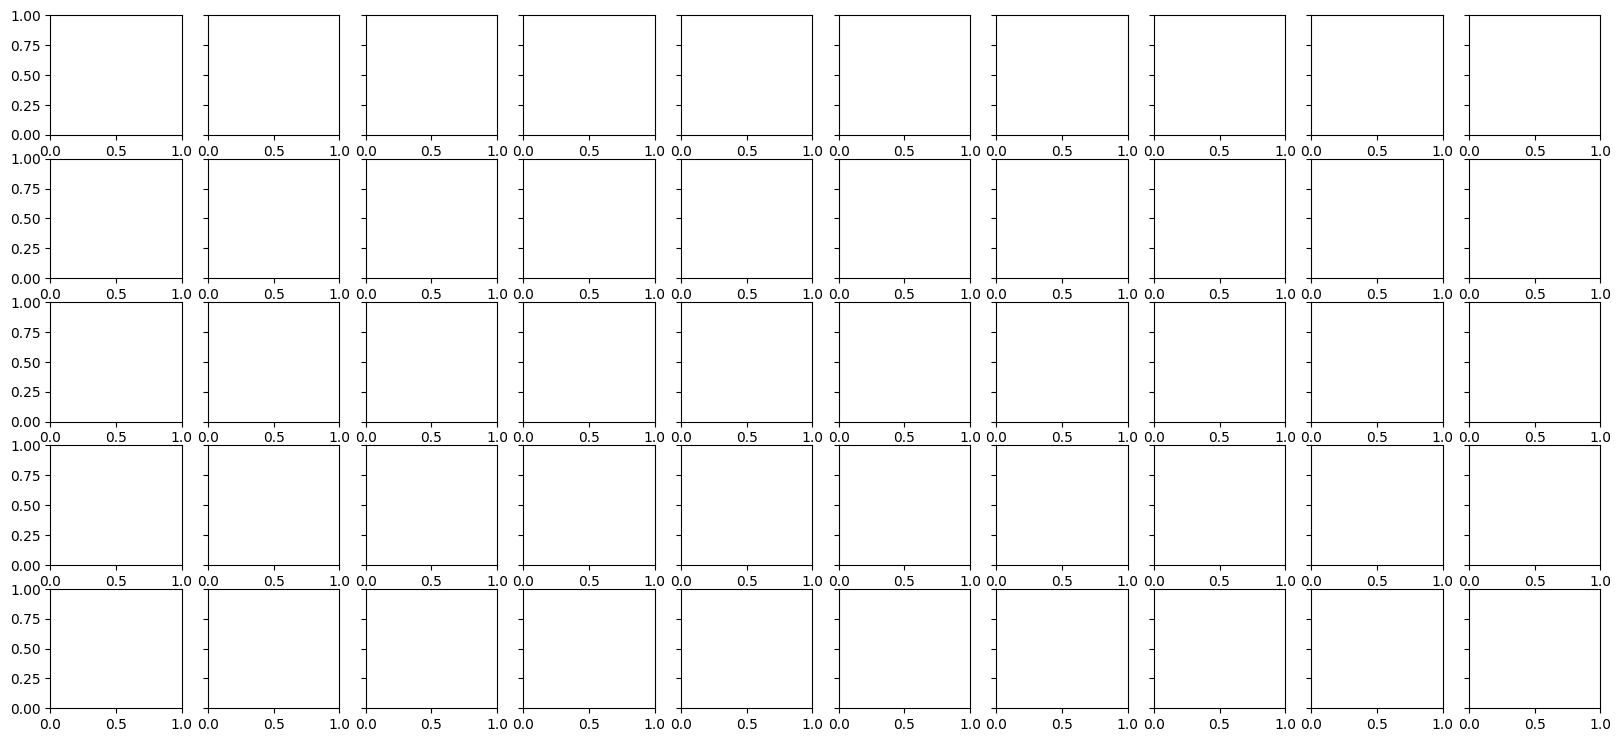

In [213]:
# FIXED CELL (DON'T CHANGE THIS CELL)
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(20, 9), sharey=True)
for i, idx in enumerate(representative_digit_idx):
    axes[i//10][i%10].imshow(X_train[idx].reshape(8, 8))

plt.axis('off')
plt.show()

In [ ]:
y_representative_digits = np.array([
    # FILL HERE
    ])

### Label Propagation
Label Propagation is a semi-supervised machine learning algorithm used for classification problems in which only some of the data points have labeled target variables. The algorithm works by propagating the labels of the labeled data points to their neighboring unlabeled data points in the feature space, using a graph-based approach. The propagation is done iteratively until the labels converge or a stopping criterion is met. The algorithm assumes that data points that are close to each other in the feature space are likely to have the same label.

#### 💭 Questions
- Run code cell below to apply label propagation
- Train Logistic Regression model using all training samples and propagated labels (`max_iter`=10000)
- Calculate the accuracy for trained model

In [ ]:
# FIXED CELL (DON'T CHANGE THIS CELL)
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [ ]:
# train model using propagated labels

____________________________________________________

# Part3: Dimension Reduction

## Frorward Selection for Lineaar Regression

Wrapper Method: We split our data into subsets and train a model using this. Based on the output of the model, we add and subtract features and train the model again. It forms the subsets using a greedy approach and evaluates the accuracy of all the possible combinations of features. Eg: Forward Selection, Backwards Elimination, etc.

In this section, we are going to use forward selection to select features.

#### 💭 Questions
- Import `fetch_california_housing` from `sklearn.datasets`
- Use `mlxtend` library to select features:
  -  Use forward selection method
  - We want to select 8 features
  - Select features based on `neg_mean_squared_error ` scoring

- Plot forward selection performance using `plot_sequential_feature_selection`

In [ ]:
!pip install mlxtend
!pip install sklearn

In [ ]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

## Normalizing Effect

In this section we are going to see when and why we should normlize our data.
#### 💭 Questions
- Create a dataframe from california_housing dataset
- Let's take look at some features that we are using:
  - Plot histogram of `MedInc` and `HouseAge`
- Is the scale of these features different?
- Use The StandardScaler class to normalize the data .
- Plot histogram of normalized `MedInc` and `HouseAge` .
- Is the scale of these features different?


In this section we are going to use all of the fetures of dataset and fit a linear regressioin model on our data befor and after normalizing.
#### 💭 Questions
- Split data to Train and Test with proportion of 80 to 20.
- Fit a linear regression model on dataset.
- Calculate mean squared error for validation
- Normilize the dataset.
- Split `normalized` data to Train and Test with proportion of 80 to 20.
- Fit a linear regression model on `normalized` dataset.
- Calculate mean squared error for `normalized` validation

## Curse of dimentionality and PCA

Principal Component Analysis is one of the easiest, most intuitive, and most frequently used methods for dimensionality reduction, projecting data onto its orthogonal feature subspace.
In this section we are going to  see how PCA will improve the results of a simple model that is not able to correctly fit all of the training data.

In this section we are going to use `Iris` dataset.

#### 💭 Questions

- Load `iris` dataset from `sklearn`.
- Split data to Train and Test with proportion of 70 to 30.
- Calculate accuracy after fitting `DecisionTreeClassifier` on dataset.
- Reduce the dimensionality to 2 dimensions.
  - NOTE: you should centerd the data befor transforming pca.
- Plot the results of PCA
- After reducing dimentions , Split data to Train and Test with proportion of 70 to 30.
- Calculate accuracy after fitting `DecisionTreeClassifier` on dataset after dimention reduction.
-Did the accuracy increase?
